In [22]:
from ultralytics import YOLO
from ultralytics.utils.ops import scale_image
import cv2
import numpy as np
from utils import (
    predict_on_image,
    overlay,
    normalize_points,
    calculate_distance,
    plot_points_and_lines_with_distances,
    detect_loose_teeth,
    showing_masking,
    
)
import matplotlib.pyplot as plt

In [23]:
model = YOLO('./models/last.pt')

In [24]:
sample_image = './sample_images/intraoral-picture.webp'
sample_image2 = './sample_images/missing_sample.jpg'

upper_sample = './sample_images/missing_sample.jpg'
lower_sample = './sample_images/lower_unique_case1.jpg'
front_sample = './sample_images/front_missing1.JPG'

### Upper tooth numbering system

In [25]:
def showing_masking(image_path):
    img =cv2.imread(image_path)
    boxes, masks, cls, probs = predict_on_image(model, img)

    # overlay masks on original image
    image_with_masks = np.copy(img)
    for mask_i in masks:
        image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)

    return plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))

In [7]:
img =cv2.imread(sample_image2]
boxes, masks, cls, probs = predict_on_image(model, img]

# overlay masks on original image
image_with_masks = np.copy(img]
for mask_i in masks:
    image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)
# cv2.imshow('',image_with_masks]


0: 608x640 13 Tooths, 116.9ms
Speed: 4.0ms preprocess, 116.9ms inference, 11.2ms postprocess per image at shape (1, 3, 608, 640)
(13, 608, 640)
(1040, 1120, 13)


In [8]:
image_with_masks.shape

(1040, 1120, 3)

In [9]:
masks.shape

(13, 1040, 1120)

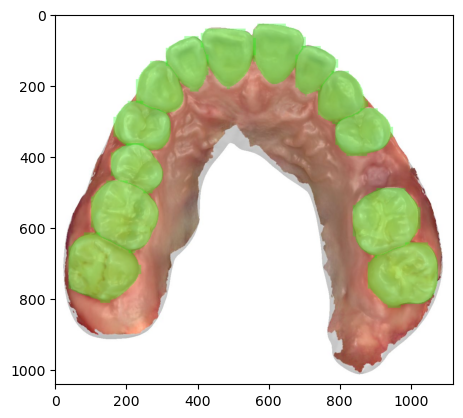

In [11]:
plt.imshow(cv2.cvtColor(image_with_masks, cv2.COLOR_BGR2RGB))


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 608x640 13 Tooths, 112.8ms
Speed: 3.9ms preprocess, 112.8ms inference, 13.1ms postprocess per image at shape (1, 3, 608, 640)


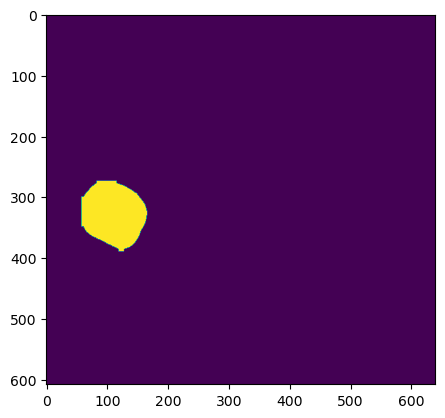

In [12]:
results = model(sample_image2)

box = results[0].boxes[0].xyxy[0]
box = box.numpy().astype(int)

# background subtraction
mask = (results[0].masks.data[1].numpy() * 255).astype('uint8')
plt.imshow(mask)

In [13]:
# Assume binary_mask is a 2D numpy array with dtype bool
centroid = np.mean(np.argwhere(mask),axis=0)
centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
centroid_x,centroid_y

(110, 328)

In [14]:
centroid

array([     328.31,      110.08])

In [15]:
mask[centroid_y,centroid_x]=1
mask[centroid_y+1,centroid_x+1]=1
mask[centroid_y-1,centroid_x+1]=1
mask[centroid_y-1,centroid_x+1]=1


mask[centroid_y+2,centroid_x+2]=1
mask[centroid_y-2,centroid_x+2]=1
mask[centroid_y-2,centroid_x+2]=1

In [16]:
centroids=[]
for i in results[0].masks.data:
    mask = (i.numpy()*255).astype('uint8')
    mask = scale_image(mask, results[0].masks.orig_shape)
    centroid = np.mean(np.argwhere(mask),axis=0)
    centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
    centroids.append([centroid_y,centroid_x])

In [17]:
centroids

[[580, 927],
 [563, 193],
 [733, 980],
 [314, 244],
 [713, 128],
 [333, 865],
 [102, 622],
 [110, 486],
 [430, 229],
 [153, 725],
 [134, 375],
 [233, 801],
 [207, 292]]

In [18]:
centroids = sorted(centroids,key= lambda x:x[1])

In [19]:
centroids

[[713, 128],
 [563, 193],
 [430, 229],
 [314, 244],
 [207, 292],
 [134, 375],
 [110, 486],
 [102, 622],
 [153, 725],
 [233, 801],
 [333, 865],
 [580, 927],
 [733, 980]]

In [20]:
normed_points = normalize_points(centroids)
normed_points

[(0.9683042789223455, 0.0),
 (0.7305863708399366, 0.07629107981220658),
 (0.5198098256735341, 0.11854460093896714),
 (0.3359746434231379, 0.13615023474178403),
 (0.1664025356576862, 0.19248826291079812),
 (0.05071315372424723, 0.289906103286385),
 (0.012678288431061807, 0.42018779342723006),
 (0.0, 0.57981220657277),
 (0.08082408874801902, 0.7007042253521126),
 (0.2076069730586371, 0.789906103286385),
 (0.36608557844690964, 0.8650234741784038),
 (0.757527733755943, 0.937793427230047),
 (1.0, 1.0)]

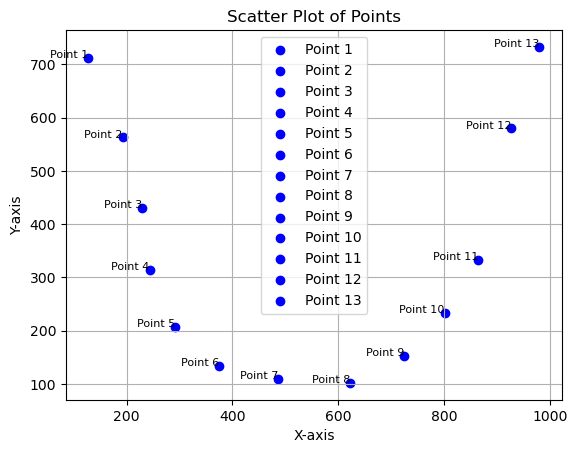

In [21]:
x_coordinates = [point[1] for point in centroids]
y_coordinates = [point[0] for point in centroids]
point_names = [f'Point {i+1}' for i in range(len(centroids))]

# Plot the points
# plt.scatter(x_coordinates, y_coordinates, marker='o', color='blue', label='Points')
for i, name in enumerate(point_names):
    plt.scatter(x_coordinates[i], y_coordinates[i], marker='o', color='blue', label=name)
    plt.text(x_coordinates[i], y_coordinates[i], name, fontsize=8, ha='right')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

In [22]:
normed_points

[(0.9683042789223455, 0.0),
 (0.7305863708399366, 0.07629107981220658),
 (0.5198098256735341, 0.11854460093896714),
 (0.3359746434231379, 0.13615023474178403),
 (0.1664025356576862, 0.19248826291079812),
 (0.05071315372424723, 0.289906103286385),
 (0.012678288431061807, 0.42018779342723006),
 (0.0, 0.57981220657277),
 (0.08082408874801902, 0.7007042253521126),
 (0.2076069730586371, 0.789906103286385),
 (0.36608557844690964, 0.8650234741784038),
 (0.757527733755943, 0.937793427230047),
 (1.0, 1.0)]

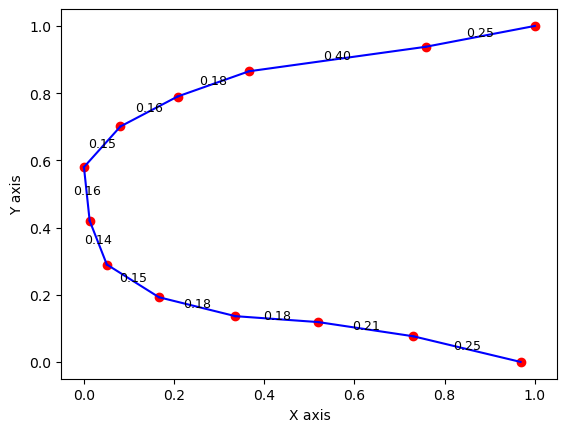

    Distance
0   0.249660
1   0.214970
2   0.184676
3   0.178686
4   0.151242
5   0.135720
6   0.160127
7   0.145422
8   0.155019
9   0.175380
10  0.398149
11  0.250325


In [23]:
points = normed_points
df, arr_distance = plot_points_and_lines_with_distances(points)

In [24]:
arr_distance

[0.2496600342105021,
 0.2149700259103444,
 0.18467629131709157,
 0.17868596237530965,
 0.15124241705151514,
 0.1357201892270488,
 0.16012711284975825,
 0.14542150297150896,
 0.15501894974847555,
 0.1753798385662985,
 0.39814874986632787,
 0.25032470432083276]

In [15]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import splprep, splev


# nodes = np.array( [ [1, 2], [5, 15], [8, 10], [10, 2 ] ])
nodes = [
    [1460, 150],  # Point 1
    [1340, 100],  # Point 2
    [800, 800],   # Point 3
    [1450, 700],  # Point 4
    [850, 900],   # Point 5
    [980, 880],   # Point 6
    [1160, 780],  # Point 7
    [1020, 880],  # Point 8
    [900, 900],   # Point 9
    [1200, 700],  # Point 10
    [980, 880]    # Point 11
]

sorted_nodes = sorted(nodes, key=lambda point: (point[1], point[0]))

nodes = np.array(sorted_nodes)

print(sorted_nodes)

x = nodes[:,0]
y = nodes[:,1]

tck,u = splprep( [x,y], k = 5)
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)

plt.plot( x,y,'o' , xnew ,ynew )
plt.legend( [ 'data' , 'spline'] )
plt.axis( [ x.min() - 1 , x.max() + 1 , y.min() - 1 , y.max() + 2 ] )
plt.show()

[[1340, 100], [1460, 150], [1200, 700], [1450, 700], [1160, 780], [800, 800], [980, 880], [980, 880], [1020, 880], [850, 900], [900, 900]]


ValueError: Invalid inputs.

In [25]:
tooth_number_dict_right = {
    11: 0,
    12: 0,
    13: 0,
    14: 0,
    15: 0,
    16: 0,
    17: 0,
    18: 0,
}

tooth_number_dict_left = {
    21: 0,
    22: 0,
    23: 0,
    24: 0,
    25: 0,
    26: 0,
    27: 0,
    28: 0,
}

In [26]:
tooth_distance_right = {
    "11-12": 6,
    "12-13": 5,
    "13-14": 4,
    "14-15": 3,
    "15-16": 2,
    "16-17": 1,
    "17-18": 0,
    "18-end-ru": 0,
}

tooth_distance_right = {
    "21-22": 6,
    "22-23": 5,
    "23-24": 4,
    "24-25": 3,
    "25-26": 2,
    "26-27": 1,
    "27-28": 0,
    "28-end-lu": 0,
}

In [94]:
import random

# Function to generate synthetic distances between teeth
def generate_tooth_distances(num_teeth):
    distances = []
    for i in range(num_teeth - 1):
        distance = round(random.uniform(0.1, 2.0), 2)  # Random distance between 0.1 and 2.0
        distances.append(distance)
    return distances

# Example usage
num_teeth = 36  # Assuming a full set of adult teeth (including wisdom teeth)
tooth_distances = generate_tooth_distances(num_teeth)

print(tooth_distances)


[1.98, 1.76, 1.26, 1.62, 1.19, 1.85, 1.99, 1.21, 1.54, 0.39, 0.62, 0.75, 1.92, 0.77, 1.47, 1.75, 0.54, 1.83, 0.91, 1.35, 0.28, 0.98, 0.91, 1.46, 1.47, 0.43, 1.38, 1.05, 1.0, 0.35, 0.53, 0.11, 1.1, 1.03, 1.1]


In [95]:
len(tooth_distances)

35

In [157]:
arr_distance

[0.2496600342105021,
 0.2149700259103444,
 0.18467629131709157,
 0.17868596237530965,
 0.15124241705151514,
 0.1357201892270488,
 0.16012711284975825,
 0.14542150297150896,
 0.15501894974847555,
 0.1753798385662985,
 0.39814874986632787,
 0.25032470432083276]

In [27]:
distance = arr_distance
new_distance = []

In [28]:
total = 0
for i in distance:
    total+=i

print(total/len(distance))    

0.19994798153458446


In [29]:
def calculate_harmonic_mean(data):
    n = len(data)
    reciprocal_sum = sum(1 / x for x in data)
    return n / reciprocal_sum

# Example list of distances
distances = [0.5, 1.0, 1.5, 2.0]

# Calculate harmonic mean
h_mean = calculate_harmonic_mean(distances)

print(f"The harmonic mean of the distances is: {h_mean}")

The harmonic mean of the distances is: 0.9600000000000002


In [30]:
# Calculate harmonic mean
h_mean = calculate_harmonic_mean(distance)

print(f"The harmonic mean of the distances is: {h_mean}")

The harmonic mean of the distances is: 0.18340401111873


In [27]:
# Given data
tooth_distances = [0.2496600342105021, 0.2149700259103444, 0.18467629131709157, 0.1868596237530965, 
                   0.15124241705151514, 0.1357201892270488, 0.16012711284975825, 0.14542150297150896, 
                   0.15501894974847555, 0.1753798385662985, 0.39814874986632787, 0.25032470432083276]

In [32]:
# # Generate synthetic data
# num_teeth = 16  # Assuming a full set of adult teeth (including wisdom teeth)
# tooth_distances = generate_tooth_distances(num_teeth)

# Detect loose teeth
threshold_factor = 1.5  # Adjust the threshold factor as needed
loose_teeth_indices, new_distance = detect_loose_teeth(arr_distance, threshold_factor)



print("Tooth Distances:", arr_distance)
print("Loose Teeth Indices:", loose_teeth_indices)
print(new_distance)
print(len(arr_distance), len(new_distance))

Tooth Distances: [0.2496600342105021, 0.2149700259103444, 0.18467629131709157, 0.17868596237530965, 0.15124241705151514, 0.1357201892270488, 0.16012711284975825, 0.14542150297150896, 0.15501894974847555, 0.1753798385662985, 0.39814874986632787, 0.25032470432083276]
Loose Teeth Indices: [11]
[0.2496600342105021, 0.2149700259103444, 0.18467629131709157, 0.17868596237530965, 0.15124241705151514, 0.1357201892270488, 0.16012711284975825, 0.14542150297150896, 0.15501894974847555, 0.1753798385662985, 1.9912616612109244, 1.9912616612109244, 0.25032470432083276]
12 13


Problem
1. when there are more then 1 teeth missing the average will be bigger and make the distance between teeth which there is missing teeth will be a normal 

Temporary solution 
1. generate all of the normal distance of the normalize image teeth
2. 

### Testing

In [34]:
img =cv2.imread(sample_image2)
boxes, masks, cls, probs = predict_on_image(model, img)

# overlay masks on original image
image_with_masks = np.copy(img)
cnt=0
for mask_i in masks:
    image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)


0: 608x640 13 Tooths, 123.5ms
Speed: 3.3ms preprocess, 123.5ms inference, 10.2ms postprocess per image at shape (1, 3, 608, 640)
(13, 608, 640)
(1040, 1120, 13)


In [60]:
upper_num_dict = {
    0: 18,
    1: 17,
    2: 16,
    3: 15,
    4: 14,
    5: 13,
    6: 12,
    7: 11,
    8: 21,
    9: 22,
    10: 23,
    11: 24,
    12: 25,
    13: 26,
    14: 27,
    15: 28,
}

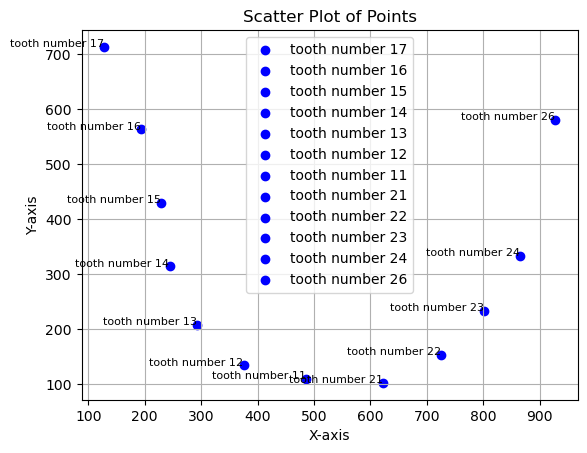

In [61]:
x_coordinates = [point[1] for point in centroids]
y_coordinates = [point[0] for point in centroids]
# point_names = [f'Point {i+1}' for i in range(len(centroids))]
point_names = [f'tooth number {upper_num_dict[num+1]}' for num in range(len(new_distance)) if num not in loose_teeth_indices]

# Plot the points
# plt.scatter(x_coordinates, y_coordinates, marker='o', color='blue', label='Points')
for i, name in enumerate(point_names):
    plt.scatter(x_coordinates[i], y_coordinates[i], marker='o', color='blue', label=name)
    plt.text(x_coordinates[i], y_coordinates[i], name, fontsize=8, ha='right')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

In [43]:
point_names

['tooth number 1',
 'tooth number 2',
 'tooth number 3',
 'tooth number 4',
 'tooth number 5',
 'tooth number 6',
 'tooth number 7',
 'tooth number 8',
 'tooth number 9',
 'tooth number 10',
 'tooth number 11',
 'tooth number 13']

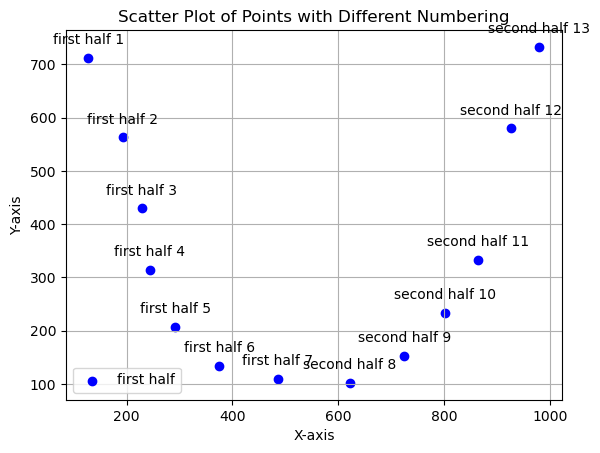

In [46]:
x = [point[1] for point in centroids]
y = [point[0] for point in centroids]
labels = [f'tooth number {i+1}' for i in range(len(x))]

# Split the labels into two different types based on x-coordinate
half_x = (max(x) + min(x)) / 2

# Step 2: Create the scatter plot
plt.scatter(x, y, color='blue')

# Step 3: Annotate each point with a unique label
for i, label in enumerate(labels):
    if x[i] <= half_x:
        plt.annotate(f'first half {i+1}', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        plt.annotate(f'second half {i+1}', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adding a legend for clarity
plt.legend(['first half', 'second half'])

# Display the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points with Different Numbering')
plt.grid(True)  # Add grid
plt.show()


In [ ]:
num_dict = {
    0: 18,
    1: 17,
    2: 16,
    3: 15,
    4: 14,
    5: 13,
    6: 12,
    7: 11,
    8: 21,
    9: 22,
    10: 23,
    11: 24,
    12: 25,
    13: 26,
    14: 27,
    15: 28,
}

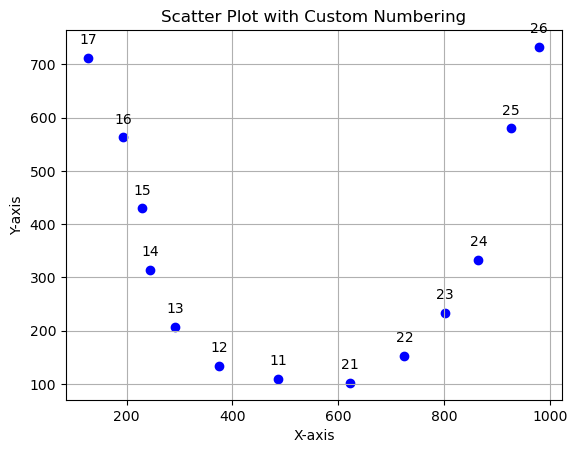

In [54]:
# Assuming these are your data points from the plot
x = [point[1] for point in centroids]
y = [point[0] for point in centroids]

# Determine the midpoint of the x-axis
half_x = (max(x) + min(x)) / 2

# Count the number of points in the first half
num_first_half = sum(1 for i in x if i <= half_x)

# Create the scatter plot
plt.scatter(x, y, color='blue')

# Label counters
first_half_label = 11 + num_first_half - 1  # Start from the highest number in the first half
second_half_label = 21  # Start from 21 for the second half

# Annotate each point with a unique label based on the x-coordinate
for i in range(len(x)):
    if x[i] <= half_x:
        plt.annotate(f'{first_half_label}', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
        first_half_label -= 1  # Decrement the label for the first half
    else:
        plt.annotate(f'{second_half_label}', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
        second_half_label += 1  # Increment the label for the second half

# Display the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Custom Numbering')
plt.grid(True)  # Add grid
plt.show()



In [56]:
num_first_half

7

### Lower Tooth Numbering System


0: 608x640 13 Tooths, 279.0ms
Speed: 8.3ms preprocess, 279.0ms inference, 11.3ms postprocess per image at shape (1, 3, 608, 640)
(13, 608, 640)
(1040, 1120, 13)


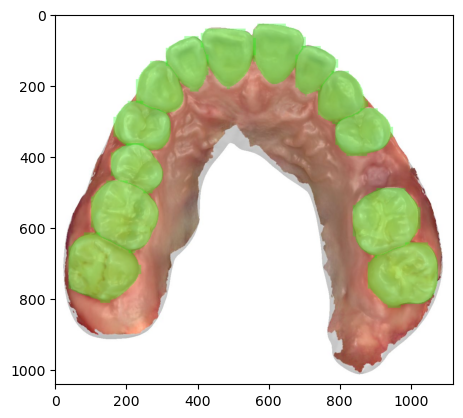

In [39]:
showing_masking(upper_sample)


image 1/1 /Users/khawaritzmi/GAIA_partime/Dental/programs/dental-mate/src/tooth-numbering/sample_images/missing_sample.jpg: 608x640 13 Tooths, 193.9ms
Speed: 15.2ms preprocess, 193.9ms inference, 10.5ms postprocess per image at shape (1, 3, 608, 640)


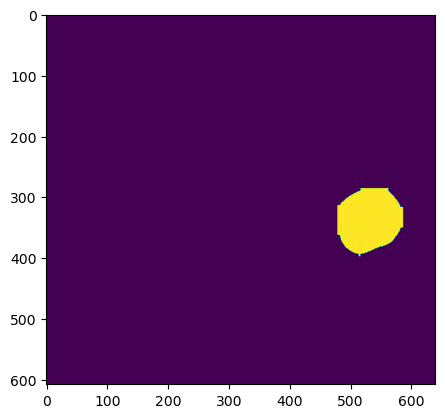

In [44]:
results = model(upper_sample)

box = results[0].boxes[0].xyxy[0]
box = box.numpy().astype(int)

# background subtraction
mask = (results[0].masks.data[0].numpy() * 255).astype('uint8')
plt.imshow(mask)

In [77]:
# # Assume binary_mask is a 2D numpy array with dtype bool
# centroid = np.mean(np.argwhere(mask),axis=0)
# centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
# centroid_x,centroid_y

(501, 113)

In [84]:
# mask[centroid_y,centroid_x]=1

In [78]:
# mask[centroid_y,centroid_x]=1
# mask[centroid_y+1,centroid_x+1]=1
# mask[centroid_y-1,centroid_x+1]=1
# mask[centroid_y-1,centroid_x+1]=1


# mask[centroid_y+2,centroid_x+2]=1
# mask[centroid_y-2,centroid_x+2]=1
# mask[centroid_y-2,centroid_x+2]=1

In [45]:
centroids=[]
for i in results[0].masks.data:
    mask = (i.numpy()*255).astype('uint8')
    mask = scale_image(mask, results[0].masks.orig_shape)
    centroid = np.mean(np.argwhere(mask),axis=0)
    centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
    centroids.append([centroid_y,centroid_x])

In [46]:
centroids

[[580, 927],
 [563, 193],
 [733, 980],
 [314, 244],
 [713, 128],
 [333, 865],
 [102, 622],
 [110, 486],
 [430, 229],
 [153, 725],
 [134, 375],
 [233, 801],
 [207, 292]]

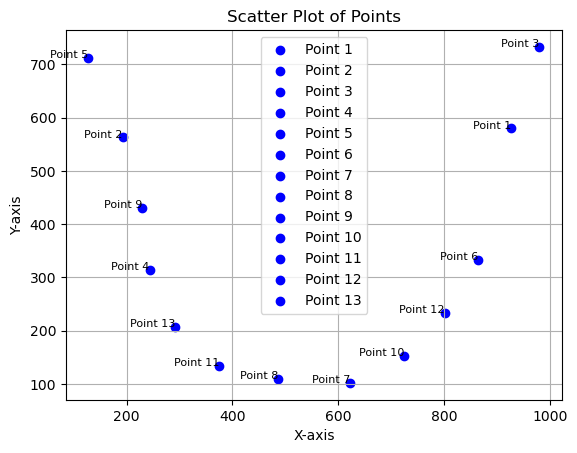

In [47]:
x_coordinates = [point[1] for point in centroids]
y_coordinates = [point[0] for point in centroids]
point_names = [f'Point {i+1}' for i in range(len(centroids))]

# Plot the points
# plt.scatter(x_coordinates, y_coordinates, marker='o', color='blue', label='Points')
for i, name in enumerate(point_names):
    plt.scatter(x_coordinates[i], y_coordinates[i], marker='o', color='blue', label=name)
    plt.text(x_coordinates[i], y_coordinates[i], name, fontsize=8, ha='right')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()

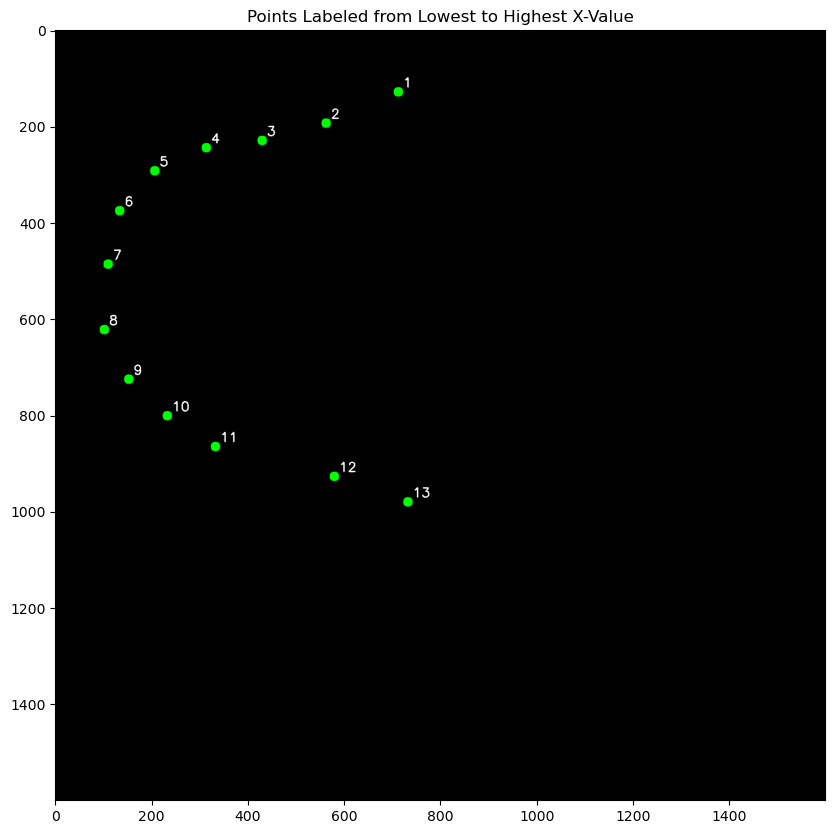

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# # List of points
# nodes = [
#     [304, 1505],
#     [122, 1550],
#     [801, 692],
#     [602, 1393],
#     [889, 789],
#     [929, 891],
#     [829, 1250],
#     [931, 1081],
#     [939, 986],
#     [728, 1324],
#     [894, 1170]
# ]

nodes = centroids

# Sorting the points based on x-coordinate
sorted_nodes = sorted(nodes, key=lambda point: point[1])

# Create a blank image for demonstration
image = np.zeros((1600, 1600, 3), dtype=np.uint8)

# Draw and label the points on the image
for i, point in enumerate(sorted_nodes):
    x, y = point
    cv2.circle(image, (x, y), 10, (0, 255, 0), -1)
    cv2.putText(image, f'{i+1}', (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Points Labeled from Lowest to Highest X-Value")
plt.show()


In [82]:
# Function to find the highest and lowest points
def find_extreme_points(points):
    # Sort points based on y-values for highest points
    highest_points = sorted(points, key=lambda x: x[1], reverse=True)[:2]
    
    # Sort points based on x-values for lowest points on the left and right
    leftmost_point = min(points, key=lambda x: x[0])
    rightmost_point = max(points, key=lambda x: x[0])
    
    return highest_points, leftmost_point, rightmost_point


Two Highest Points: [(850, 900), (900, 900)]
Lowest Point on the Left: (800, 800)
Lowest Point on the Right: (1460, 150)


In [87]:
highest_points, leftmost_point, rightmost_point = find_extreme_points(centroids)

print("Two Highest Points:", highest_points)
print("Lowest Point on the Left:", leftmost_point)
print("Lowest Point on the Right:", rightmost_point)

Two Highest Points: [[122, 1550], [304, 1505]]
Lowest Point on the Left: [122, 1550]
Lowest Point on the Right: [939, 986]


In [88]:
points = [
    (1460, 150),  # Point 1
    (1340, 100),  # Point 2
    (800, 800),   # Point 3
    (1450, 700),  # Point 4
    (850, 900),   # Point 5
    (980, 880),   # Point 6
    (1160, 780),  # Point 7
    (1020, 880),  # Point 8
    (900, 900),   # Point 9
    (1200, 700),  # Point 10
    (980, 880)    # Point 11
]

# Function to find the highest points based on y-values
def find_highest_points(points, n=2):
    # Sort points based on y-values in descending order
    highest_points = sorted(points, key=lambda x: x[1], reverse=True)[:n]
    return highest_points

# Find the two highest points
highest_points = find_highest_points(points)

# Determine which is the leftmost and rightmost
highest_left = min(highest_points, key=lambda x: x[0])
highest_right = max(highest_points, key=lambda x: x[0])

# Assign counts to points starting from the highest points
counts_right = range(31, 39)
counts_left = range(41, 49)

assigned_counts = {}

# Assign counts starting from the highest right point
assigned_counts[highest_right] = counts_right[0]
for i, point in enumerate(sorted(points, key=lambda x: (x[1], x[0]), reverse=True)):
    if point != highest_right and counts_right[i]:
        assigned_counts[point] = counts_right[i]

# Assign counts starting from the highest left point
assigned_counts[highest_left] = counts_left[0]
for i, point in enumerate(sorted(points, key=lambda x: (x[1], -x[0]), reverse=True)):
    if point != highest_left and counts_left[i]:
        assigned_counts[point] = counts_left[i]

print("Assigned Counts:", assigned_counts)


IndexError: range object index out of range

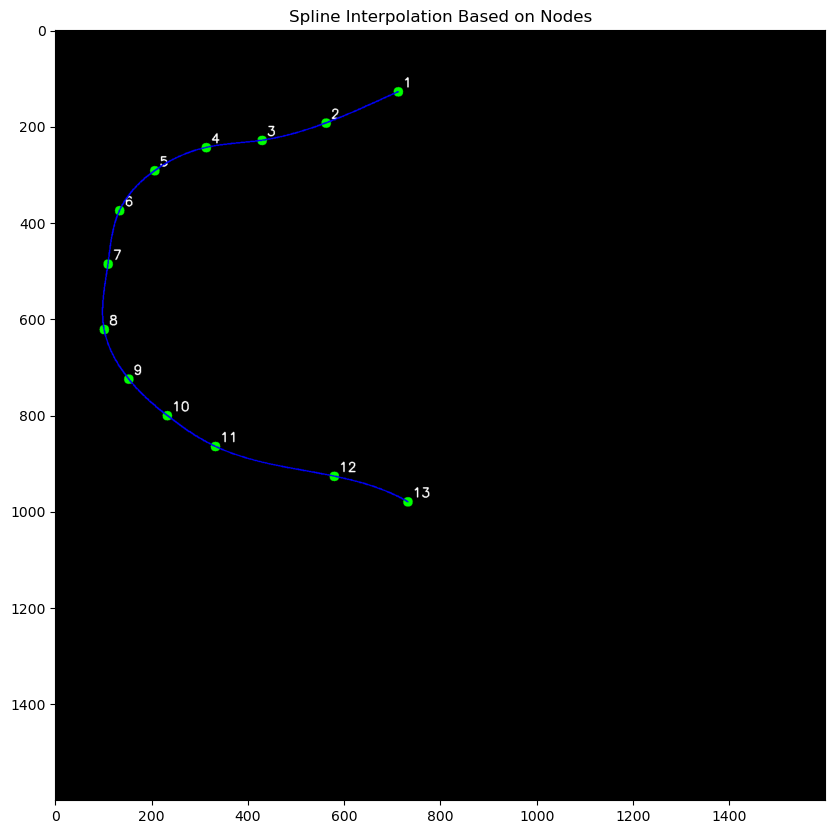

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# List of points
nodes = centroids

# Sort nodes based on x-coordinate for consistency in plotting
nodes = sorted(nodes, key=lambda point: point[1])

# Separate the x and y coordinates
x = [point[0] for point in nodes]
y = [point[1] for point in nodes]

# Create the spline representation of the curve
tck, u = splprep([x, y], s=0)
unew = np.linspace(0, 1, 1000)
out = splev(unew, tck)

# Create a blank image for demonstration
image = np.zeros((1600, 1600, 3), dtype=np.uint8)

# Draw and label the original points on the image
for i, point in enumerate(nodes):
    x, y = point
    cv2.circle(image, (x, y), 10, (0, 255, 0), -1)
    cv2.putText(image, f'{i+1}', (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

# Draw the spline on the image
for i in range(len(out[0]) - 1):
    pt1 = (int(out[0][i]), int(out[1][i]))
    pt2 = (int(out[0][i + 1]), int(out[1][i + 1]))
    cv2.line(image, pt1, pt2, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Spline Interpolation Based on Nodes")
plt.show()
